In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from scipy.linalg import eigh, LinAlgError

In [2]:
import torchaudio.transforms
import torch

In [3]:
### Loading data
noise_mask_0 = np.load('../model_results/model_output/noise_mask_mic0.npy')
target_mask_0 = np.load('../model_results/model_output/target_mask_mic0.npy')
noise_mask_1 = np.load('../model_results/model_output/noise_mask_mic1.npy')
target_mask_1 = np.load('../model_results/model_output/target_mask_mic1.npy')

#pred_spec_1_imag = np.load('../model_results/model_output/pred_spec_1_imag.npy')
#pred_spec_1_real = np.load('../model_results/model_output/pred_spec_1_real.npy')
#pred_spec_2_imag = np.load('../model_results/model_output/pred_spec_2_imag.npy')
#pred_spec_2_real = np.load('../model_results/model_output/pred_spec_2_real.npy')

mixture_spec_mic0 = np.load('../model_results/model_output/mixture_spec_mic0.npy')
mixture_spec_mic0 = mixture_spec_mic0[:,:256,:]
mixture_spec_mic1 = np.load('../model_results/model_output/mixture_spec_mic1.npy')
mixture_spec_mic1 = mixture_spec_mic1[:,:256,:]

In [4]:
#Useful functions
def plot_spectrogram(data, title="Spectrogram", ylabel='Frequency bins', xlabel='Time frames'):
    plt.figure(figsize=(10, 4))
    plt.imshow(data, aspect='auto', origin='lower')
    plt.colorbar()
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()
    
def count_negative_values(real_part_mask, imaginary_part_mask):
    # Count negative values in the real part mask
    num_negatives_real = np.sum(real_part_mask < 0)
    
    # Count negative values in the imaginary part mask
    num_negatives_imaginary = np.sum(imaginary_part_mask < 0)
    print (f'num_negatives_real: {num_negatives_real}')
    print (f'num_negatives_imaginary: {num_negatives_imaginary}')
    
    return num_negatives_real, num_negatives_imaginary


def plot_psd(freqs, psd_avg, title='Average Power Spectral Density'):
    """
    Plot the Power Spectral Density (PSD) given a frequency vector and average PSD data.

    Args:
    freqs (array-like): Array of frequency bins corresponding to the PSD data.
    psd_avg (array-like): Average PSD data to plot.
    title (str): Title of the plot.

    Returns:
    None: This function only plots the PSD.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(freqs, psd_avg)
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')
    plt.grid(True)
    plt.show()
    import matplotlib.pyplot as plt
import torch

def plot_psd_scatter(freqs, psd_avg, title='Average Power Spectral Density (Scatter)'):
    """
    Plot the Power Spectral Density (PSD) using a scatter plot.

    Args:
    freqs (array-like): Array of frequency bins corresponding to the PSD data.
    psd_avg (array-like): Average PSD data to plot, expected to be 1D.
    title (str): Title of the plot.

    Returns:
    None: This function only plots the PSD.
    """
    frequency_bins = np.arange(freqs.shape[0])
    plt.figure(figsize=(12, 8))
    num_channels = psd_avg.shape[0]
    colors = plt.cm.viridis(np.linspace(0, 1, num_channels))  # Using the viridis colormap, can be changed

    for i in range(num_channels):
        psd_channel = psd_avg[i].numpy()
        plt.scatter(frequency_bins, psd_channel, alpha=0.6, edgecolors='w', s=20, color=colors[i], label=f'Channel {i + 1}')

    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')
    plt.grid(True)
    plt.legend()
    plt.show()

In [5]:
pred_spec_1_real = librosa.amplitude_to_db(pred_spec_1_real, ref=np.max)
plot_spectrogram(pred_spec_1_real, title="Real Part of Predicted Spectrogram 1")
plot_spectrogram(pred_spec_1_imag, title="Imaginary Part of Predicted Spectrogram 1")

NameError: name 'pred_spec_1_real' is not defined

In [5]:
# Print the shapes of the arrays
print(f"Shape of target_mask_0: {target_mask_0.shape}")
print(f"Shape of noise_mask_0: {noise_mask_0.shape}")
print(f"Shape of target_mask_1: {target_mask_1.shape}")
print(f"Shape of noise_mask_1: {noise_mask_1.shape}")
#print(f"Shape of pred_spec_1_real: {pred_spec_1_real.shape}")
#print(f"Shape of pred_spec_1_imag: {pred_spec_1_imag.shape}")
#print(f"Shape of pred_spec_2_real: {pred_spec_2_real.shape}")
#print(f"Shape of pred_spec_2_imag: {pred_spec_2_imag.shape}")
print(f"Shape of mixture_spec_mic0: {mixture_spec_mic0.shape}")
print(f"Shape of mixture_spec_mic1: {mixture_spec_mic1.shape}")

# If you want to see basic stats about the masks, you can do the following:
#print(f"Target Mask - Min: {np.min(target_mask)}, Max: {np.max(target_mask)}, Mean: {np.mean(target_mask)}, Std: {np.std(target_mask)}")
#print(f"Noise Mask - Min: {np.min(noise_mask)}, Max: {np.max(noise_mask)}, Mean: {np.mean(noise_mask)}, Std: {np.std(noise_mask)}")


Shape of target_mask_0: (1, 2, 256, 256)
Shape of noise_mask_0: (1, 2, 256, 256)
Shape of target_mask_1: (1, 2, 256, 256)
Shape of noise_mask_1: (1, 2, 256, 256)
Shape of mixture_spec_mic0: (2, 256, 256)
Shape of mixture_spec_mic1: (2, 256, 256)


In [6]:
num_negatives_real, num_negatives_imaginary = count_negative_values(target_mask[0,0], target_mask[0,1])

NameError: name 'target_mask' is not defined

In [6]:
#Prepare data for PSD calculation
# Convert to PyTorch tensors
mixture_spec_mic0_tensor = torch.from_numpy(mixture_spec_mic0)
mixture_spec_mic1_tensor = torch.from_numpy(mixture_spec_mic1)
#target_mask_0_tensor = target_mask_0_tensor[:,:,-1,:]
#target_mask_1_tensor = target_mask_1_tensor[:,:,-1,:]
target_mask_0_tensor = torch.from_numpy(target_mask_0)
target_mask_1_tensor = torch.from_numpy(target_mask_1)

noise_mask_0_tensor = torch.from_numpy(noise_mask_0)
noise_mask_1_tensor = torch.from_numpy(noise_mask_1)

spectrogram_tensor = torch.stack([mixture_spec_mic0_tensor, mixture_spec_mic1_tensor], dim=0)
target_mask_tensor = torch.stack([target_mask_0_tensor,target_mask_1_tensor], dim=0) 
target_mask_tensor = target_mask_tensor[:,0,:,:]
noise_mask_tensor = torch.stack([noise_mask_0_tensor,noise_mask_1_tensor], dim=0) 
noise_mask_tensor = noise_mask_tensor[:,0,:,:]
 

In [7]:
print(f"Shape of spectrogram_tensor: {spectrogram_tensor.shape}")
print(f"Shape of target_mask_tensor: {target_mask_tensor.shape}")
print(f"Shape of target_mask_tensor: {noise_mask_tensor.shape}")

Shape of spectrogram_tensor: torch.Size([2, 2, 256, 256])
Shape of target_mask_tensor: torch.Size([2, 2, 256, 256])
Shape of target_mask_tensor: torch.Size([2, 2, 256, 256])


In [8]:
#Compute PSD Matrices
psd_transform = torchaudio.transforms.PSD(multi_mask=True)

In [9]:
psd_matrix_target = psd_transform(spectrogram_tensor.unsqueeze(0), target_mask_tensor.unsqueeze(0))
psd_matrix_target = psd_matrix_target.squeeze(0)
psd_matrix_noise = psd_transform(spectrogram_tensor.unsqueeze(0), noise_mask_tensor.unsqueeze(0))
psd_matrix_noise = psd_matrix_noise.squeeze(0)

In [10]:
print(f"Shape of psd_matrix_target: {psd_matrix_target.shape}")
print(f"Shape of psd_matrix_noise: {psd_matrix_noise.shape}")

Shape of psd_matrix_target: torch.Size([2, 256, 2, 2])
Shape of psd_matrix_noise: torch.Size([2, 256, 2, 2])


In [11]:
#Back to numpy 
spectrogram_array = spectrogram_tensor.detach().cpu().numpy()
target_mask_array = target_mask_tensor.detach().cpu().numpy()
noise_mask_array = noise_mask_tensor.detach().cpu().numpy()
#psd_matrix_noise = psd_matrix_noise.detach().cpu().numpy()
#psd_matrix_target = psd_matrix_target.detach().cpu().numpy()

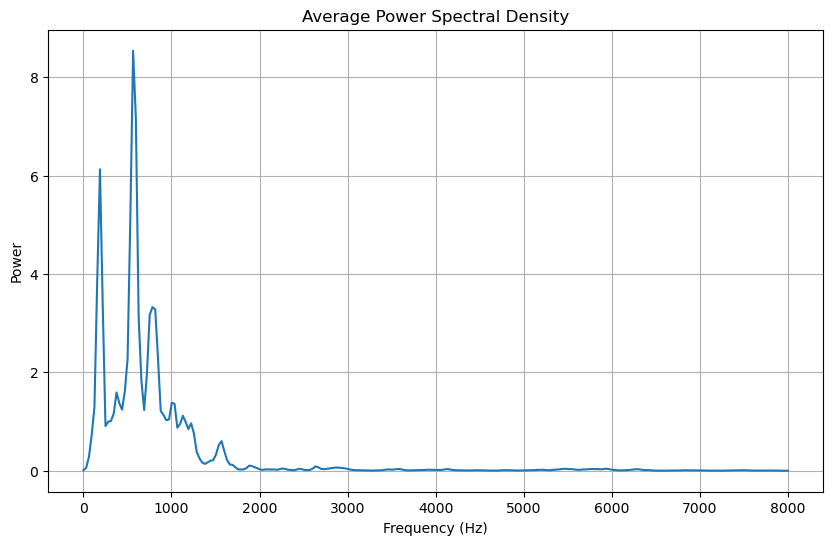

In [12]:
# Calculate the PSD average over both channel dimensions
psd_matrix_target = psd_matrix_target.squeeze(0)  # Assuming batch size is 1
psd_magnitude = torch.abs(psd_matrix_target)
psd_avg = torch.mean(psd_magnitude, dim=(-2, -1))  # Averaging across both channel dimensions

# Frequency vector
fs = 16000  # Sampling frequency in Hz
n_fft = 512  # Number of FFT points
freqs = torch.linspace(0, fs / 2, psd_avg.shape[0])  # Make sure this matches the final averaged dimension

# Now plot the PSD
#plot_psd(freqs, psd_avg)
# Assuming psd_matrix_target is the PSD matrix with shape [2, 256, 2, 2]
# Extract auto-spectral densities for each condition and each channel
auto_psd_0 = psd_matrix_target[:, :, 0, 0]  # Auto-PSD of channel 0
auto_psd_1 = psd_matrix_target[:, :, 1, 1]  # Auto-PSD of channel 1

# Average the auto-PSDs across the channels and conditions (if it makes sense for your analysis)
average_psd = (auto_psd_0 + auto_psd_1) / 2
average_psd = torch.mean(average_psd, dim=0)  # Averaging across the two sets if applicable

# Frequency vector (assuming you know the frequency resolution or the FFT size)
fs = 16000  # Sampling frequency in Hz
n_fft = 512  # Number of FFT points
freqs = torch.linspace(0, fs / 2, average_psd.shape[0])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(freqs, average_psd.numpy())
plt.title('Average Power Spectral Density')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.grid(True)
plt.show()

In [13]:
print(freqs.shape)
print(psd_avg.shape)

torch.Size([256])
torch.Size([2, 256])


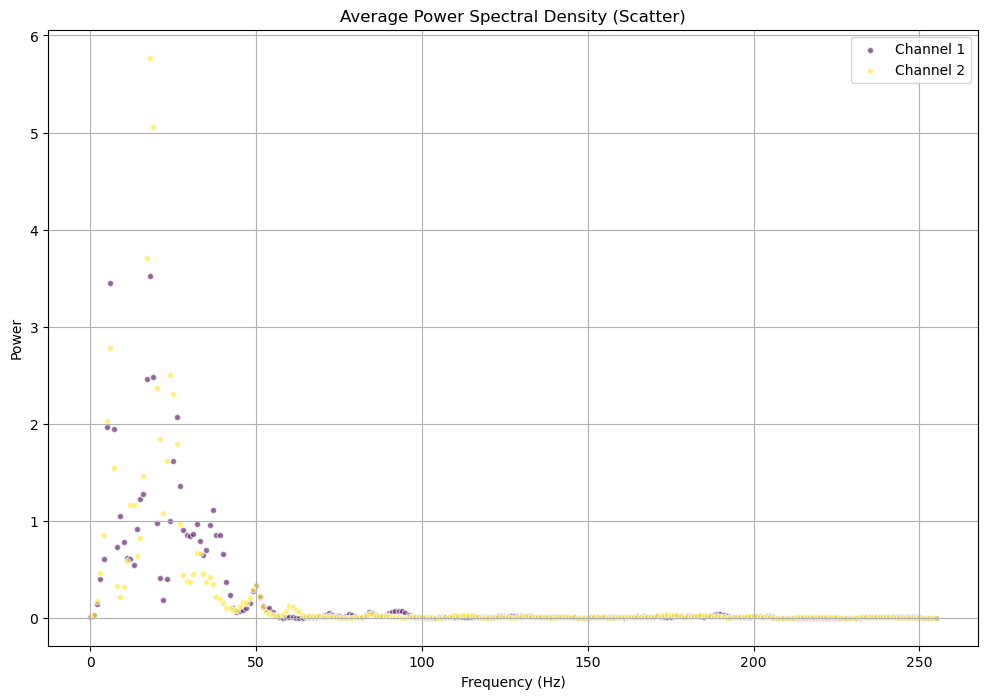

In [14]:
plot_psd_scatter(freqs, psd_avg)

In [28]:
def condition_covariance(x, gamma):
    """
    Stabilizes the covariance matrix by adding a scaled identity matrix.
    :param x: Covariance matrix (tensor)
    :param gamma: Regularization parameter
    :return: Regularized covariance matrix
    """
    traces = torch.diagonal(x, dim1=-2, dim2=-1).sum(-1)

    # Scale for regularization
    # Scales need to be reshaped to [batch, freq, 1, 1] for broadcasting to work correctly with x
    scales = (gamma * traces / x.shape[-1]).unsqueeze(-1).unsqueeze(-1)
    
    
    
    print (x.shape)
    #traces = torch.diagonal(x, dim1=-2, dim2=-1).sum(-1)

    # Scale for regularization
    # Scales need to be reshaped to [batch, freq, 1, 1] for broadcasting to work correctly with x
    #scales = (gamma * traces / x.shape[-1]).unsqueeze(-1).unsqueeze(-1)
    identity_matrix = torch.eye(x.shape[-1], device=x.device, dtype=x.dtype)
    
    scale = gamma * torch.trace(x) / x.shape[-1]
   
    scaled_eye = identity_matrix * scale
    return (x + scaled_eye) / (1 + gamma)

def phase_correction(vector):
    """
    Phase correction to reduce distortions due to phase inconsistencies.
    Args:
        vector: Beamforming vector with shape (bins, sensors) as a complex tensor.
    Returns: Phase corrected beamforming vectors.
    """
    w = vector.clone()
    F, D = w.shape
    for f in range(1, F):
        phase_correction_factor = torch.exp(-1j * torch.angle(torch.sum(w[f, :] * w[f-1, :].conj())))
        w[f, :] *= phase_correction_factor
    return w

def get_gev_vector(target_psd_matrix, noise_psd_matrix, base_reg_param=1e-6):
    bins, num_channels, _ = noise_psd_matrix.shape
    beamforming_vector = torch.empty((bins, num_channels), dtype=target_psd_matrix.dtype, device=target_psd_matrix.device)
    for f in range(bins):
        regularization_success = False
        reg_param = base_reg_param
        while not regularization_success:
            try:
                # Apply regularization
                reg_identity = torch.eye(num_channels, dtype=target_psd_matrix.dtype, device=target_psd_matrix.device) * reg_param
                noise_psd_reg = noise_psd_matrix[f, :, :] + reg_identity

                # Attempt to compute the eigenvalues and eigenvectors
                eigenvals, eigenvecs = eigh(target_psd_matrix[f, :, :], noise_psd_reg)
                beamforming_vector[f, :] = eigenvecs[:, -1]
                regularization_success = True  # Exit loop if successful
            except RuntimeError as e:
                # Increase the regularization parameter if the matrix is still not positive definite
                reg_param *= 10
                if reg_param > 1e-3:  # Avoid excessively high regularization
                    print(f"Could not regularize matrix at bin {f} even with high regularization: {e}")
                    break

    return beamforming_vector

In [31]:
class GEVBeamformer:
    def __init__(self, gamma=1e-6):
        self.gamma = gamma

    def compute_psd_matrix(self, observation, mask=None, normalize=True):
        # Use the previously defined function
        return get_power_spectral_density_matrix(observation, mask, normalize)

    def condition_covariance(self, x):
        # Use the previously defined function
        return condition_covariance(x, self.gamma)  

    def get_beamforming_vector(self, target_psd_matrix, noise_psd_matrix):
        # First, condition the noise PSD matrix
        conditioned_noise_psd = self.condition_covariance(noise_psd_matrix)
        # Then, get the GEV beamforming vector
        return get_gev_vector(target_psd_matrix, conditioned_noise_psd)
    
    def gev_wrapper_on_masks(self, mix, target_psd, noise_psd, normalization=False):
        
        org_dtype = mix.dtype
        mix = mix.to(torch.cdouble)  # Convert to complex double precision
        mix = mix.transpose(0, 1)  # Transpose the matrix
                
        #print shapes of masks for debugging
        print (f'The shape of noise_psd is: {noise_psd.shape}')
        print (f'The type of noise_psd is: {noise_psd.dtype}')
            
        # Calculate the trace, reshaping appropriately
        #noise_psd = torch.diagonal(noise_psd, dim1=-2, dim2=-1).sum(-1, keepdim=True).unsqueeze(-1)
        #noise_psd = noise_psd[:,:,0,0]
        
        #print shapes of masks for debugging
        print (f'The shape of noise_psd is: {noise_psd.shape}')
        print (f'The type of noise_psd is: {noise_psd.dtype}')
        
        # Condition the noise covariance matrix
        noise_psd = condition_covariance(noise_psd, 1e-6)

        
        #print shapes of masks for debugging
        print (f'The shape of noise_psd is: {noise_psd.shape}')
        print (f'The shape of target_psd is: {target_psd.shape}')
        

        # Get the GEV vector
        W_gev = get_gev_vector(target_psd, noise_psd)

        # Apply phase correction
        W_gev = phase_correction(W_gev)

        # Apply normalization if specified
        if normalization:
            W_gev = blind_analytic_normalization(W_gev, noise_psd)

        # Apply the beamforming vector
        output = apply_beamforming_vector(W_gev, mix)

        # Convert the output back to the original data type and transpose back
        output = output.to(org_dtype).transpose(0, 1)

        return output
   

In [32]:
print (spectrogram_tensor.dtype)
spectrogram_tensor = spectrogram_tensor.to(torch.cdouble)  # Convert to complex double precision
spectrogram_tensor = spectrogram_tensor.transpose(0, 1)  # Transpose the matrix
print (spectrogram_tensor.dtype)
gev = GEVBeamformer()
print (spectrogram_tensor.dtype)
gev.gev_wrapper_on_masks(spectrogram_tensor, psd_matrix_target,  psd_matrix_noise)

torch.complex128
torch.complex128
torch.complex128
The shape of noise_psd is: torch.Size([2, 256, 2, 2])
The type of noise_psd is: torch.float64
The shape of noise_psd is: torch.Size([2, 256, 2, 2])
The type of noise_psd is: torch.float64
torch.Size([2, 256, 2, 2])


RuntimeError: trace: expected a matrix, but got tensor with dim 4